# Parte 1

Crea una función a la que se pase como input: 
- un vector 'x' de features distribuidos uniformemente, 
- unos valores 'a' y 'b', parámetros del modelo lineal:

$y = a + b \cdot x$

- dos parámetros 'm' y 'n' que nos den la sigma de una distribución gaussiana: 

$\sigma = m + n \cdot x^2$. 

La función debe devolver una matriz que contenga en la primera columna un vector con el término independiente: 

$y = a + b \cdot x + gauss(0, \sigma = m + n \cdot x^2)$ 

y en la segunda columna la 

$\sigma = m + n \cdot x^2$ 

Nota: Este ejercicio es igual al que ya realizamos, salvo porque ahora la sigma del término estocástico depende de cada punto.

In [1]:
get.y <- function(x, intercept, angular.coeff, std.dev.a, std.dev.b){
    y <- c()
    sigma <- c()
    for (value in x){
        my.sigma  <- std.dev.a + std.dev.b * value^2
        sigma <- c(sigma, my.sigma) 
        y <- c(y, rnorm(1, (angular.coeff*value + intercept), sigma))
    }
    my.out.table <- cbind(y, sigma)
    return(as.data.frame(my.out.table))
}

# Parte 2

Crea una función que encuentre el valor de los parámetros que hace máximo el ML usando la fórmula análitica.

In [2]:
my.ML <- function(vec.x, mat.y){
    cov.y <- diag(mat.y$sigma)
    ones <- rep(c(1), length(vec.x))
    mat.x <- cbind(ones, vec.x)
    x.T <- t(mat.x)
    xT.cov.x <- solve(x.T %*% solve(cov.y) %*% mat.x)
    xT.cov.y <- x.T %*% solve(cov.y) %*% mat.y$y
    my.params <- xT.cov.x %*% xT.cov.y
    return(my.params)
}


# Parte 3

Crea un vector x distribuido uniformemente en (0, 10), y encuentra el mínimo para:
- a = 1; 
- b = 2; 
- m = 0.1; 
- n = 0.04. 

Pinta los datos, sus errores y la recta de ajuste. 

ones,1.118291
vec.x,1.971801


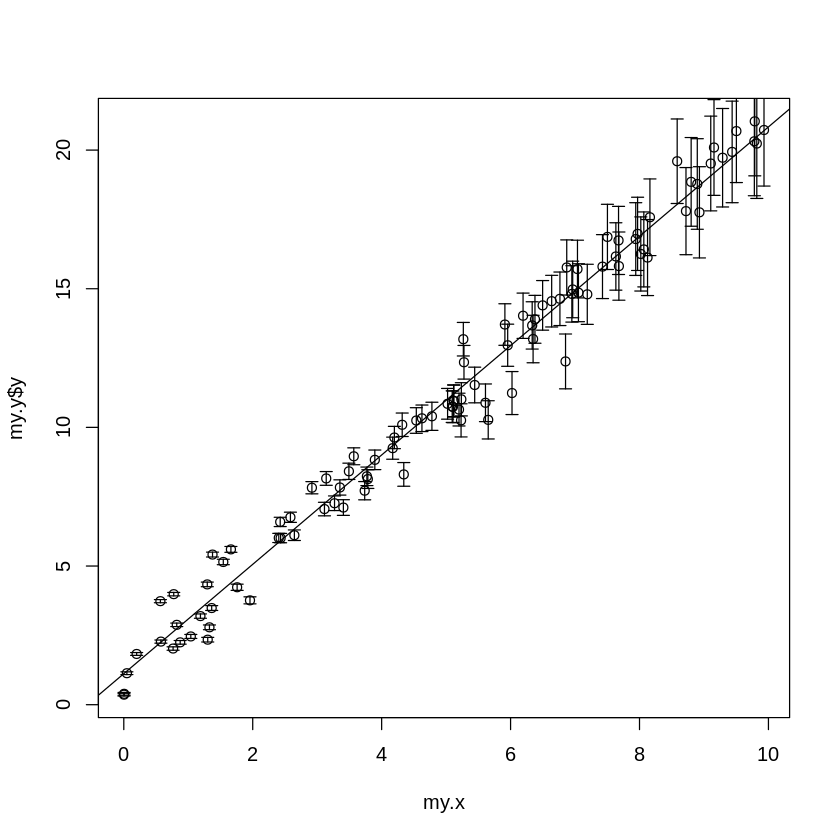

In [3]:
# Defino los parametros
a <- 1
b <- 2
m <- 0.1
n <- 0.04

# Produzco los vectores de x e y
my.x <- runif(100, 0, 10)
#my.x

my.y <- get.y(my.x, a, b, m, n)
#my.y

theta <- my.ML(my.x, my.y)

theta

plot(my.x, my.y$y)
abline(theta)
arrows(my.x, my.y$y - my.y$sigma / 2, my.x, my.y$y + my.y$sigma / 2, length = 0.05, angle = 90, code = 3)

# Parte 4 

Genera un vector con 10000 números distribuidos exponencialmente con un valor de rate = $\frac{1}{5.27}$. 

Crea un histograma con este vector usando como rango (0, 30) y con una anchura de bin = 1.

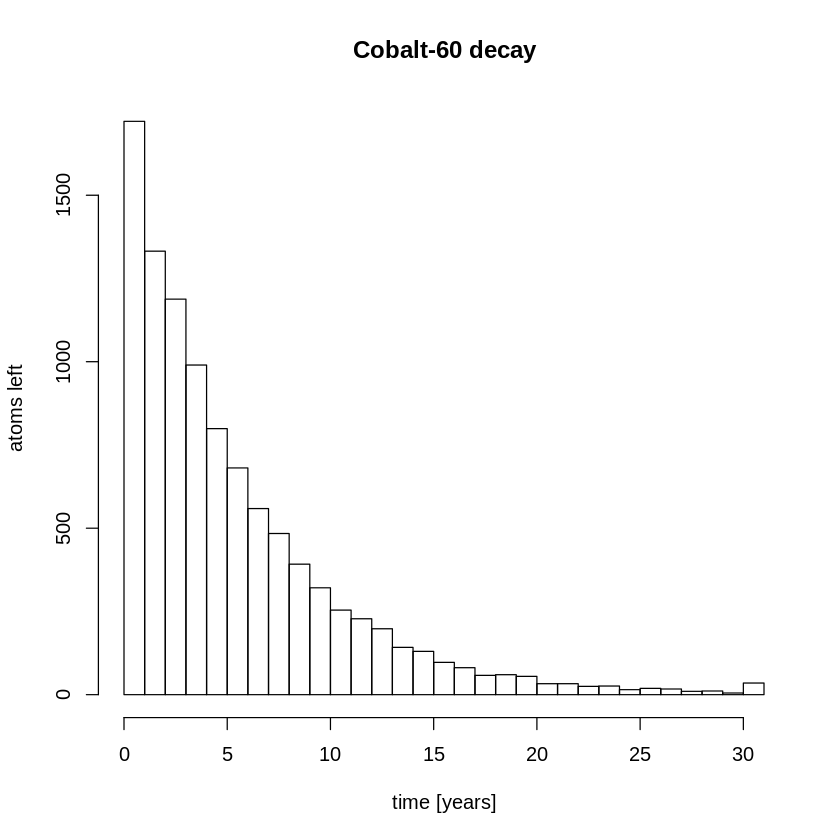

In [4]:
# Defino los parametros
N <- 10000
half.life <- 5.27

cobalto <- rexp(N, 1/half.life)


my.hist <- hist(ifelse(cobalto>30,31,cobalto), breaks = seq(0,31,1),
               xlab = "time [years]",
               ylab = "atoms left",
               main = "Cobalt-60 decay")

In [5]:
my.hist

$breaks
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31

$counts
 [1] 1722 1332 1188  990  799  681  559  484  392  321  254  228  198  142  130
[16]   97   81   58   60   55   33   33   25   26   15   19   17   10   11    5
[31]   35

$density
 [1] 0,1722 0,1332 0,1188 0,0990 0,0799 0,0681 0,0559 0,0484 0,0392 0,0321
[11] 0,0254 0,0228 0,0198 0,0142 0,0130 0,0097 0,0081 0,0058 0,0060 0,0055
[21] 0,0033 0,0033 0,0025 0,0026 0,0015 0,0019 0,0017 0,0010 0,0011 0,0005
[31] 0,0035

$mids
 [1]  0,5  1,5  2,5  3,5  4,5  5,5  6,5  7,5  8,5  9,5 10,5 11,5 12,5 13,5 14,5
[16] 15,5 16,5 17,5 18,5 19,5 20,5 21,5 22,5 23,5 24,5 25,5 26,5 27,5 28,5 29,5
[31] 30,5

$xname
[1] "ifelse(cobalto > 30, 31, cobalto)"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

# Parte 5

Escribe una función que tome como input el valor 'N' y $\lambda$ de una exponencial: 

$N \cdot e^{-t / \lambda}$ 

y calcula el 'l' asociado al valor del likelihood para este modelo y este histograma.

In [6]:
in.histogram = my.hist

get.ML.l <- function(N.zero, my.lambda){#, in.histogram){
    #N.zero <- N / my.lambda
    return(-sum(log(dpois(in.histogram$counts, lambda = N.zero * exp(-in.histogram$mids / my.lambda)))))
}
get.ML.l(N / half.life, half.life)   #, my.hist)

[1] 146,2733

# Parte 6

Utiliza la función *mle* para hallar los valores de 'N' y $\lambda$ que maximizan el likelihood. 

Usa como valores iniciales:
- N = 4000 
- $\lambda = 4$. 

Pinta el histograma y la función exponencial ajustada.  

In [10]:
library(stats4)

N.start = 2000
lambda.start = 4

my.exp.result <- mle(get.ML.l, start=list(N.zero = N.start, my.lambda = lambda.start), nobs = length(in.histogram$breaks))
my.exp.result


Call:
mle(minuslogl = get.ML.l, start = list(N.zero = N.start, my.lambda = lambda.start), 
    nobs = length(in.histogram$breaks))

Coefficients:
     N.zero   my.lambda 
1845,747223    5,444037 

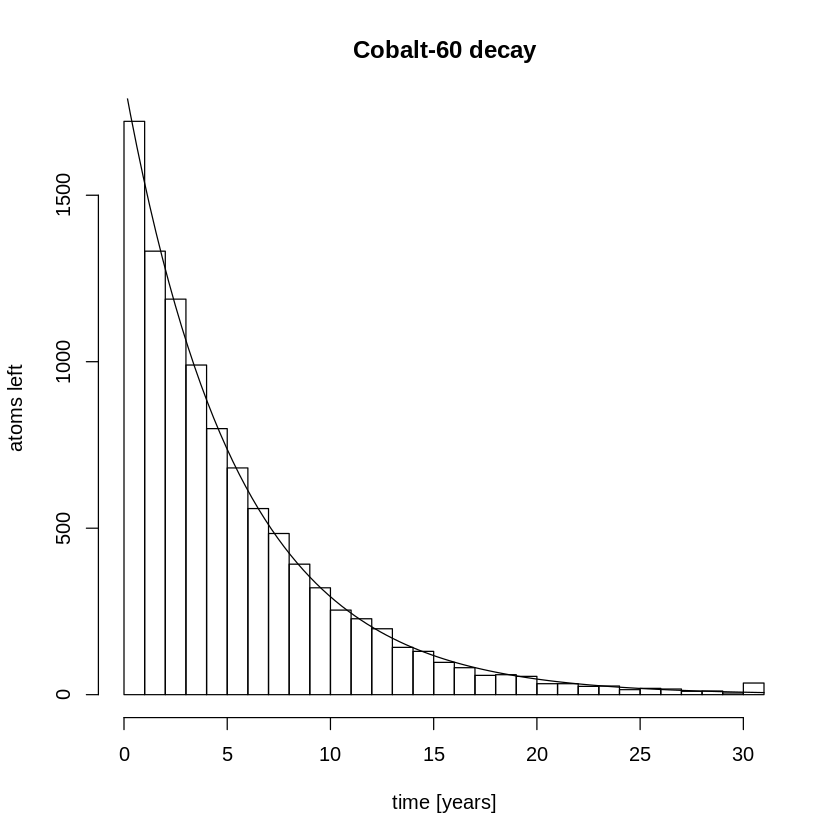

In [8]:
plot(my.hist,
    xlab = "time [years]",
    ylab = "atoms left",
    main = "Cobalt-60 decay")

curve(coef(my.exp.result)[1]*exp(-x/coef(my.exp.result)[2]), add = T)